In [1]:
#librerías
import pandas as pd
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#data wrangling + EDA
df = pd.read_csv ('banknote_authentication.csv')
df

V1        V2       V3       V4  Class
0     3.62160   8.66610  -2.8073 -0.44699      1
1     4.54590   8.16740  -2.4586 -1.46210      1
2     3.86600  -2.63830   1.9242  0.10645      1
3     3.45660   9.52280  -4.0112 -3.59440      1
4     0.32924  -4.45520   4.5718 -0.98880      1
...       ...       ...      ...      ...    ...
1367  0.40614   1.34920  -1.4501 -0.55949      2
1368 -1.38870  -4.87730   6.4774  0.34179      2
1369 -3.75030 -13.45860  17.5932 -2.77710      2
1370 -3.56370  -8.38270  12.3930 -1.28230      2
1371 -2.54190  -0.65804   2.6842  1.19520      2

[1372 rows x 5 columns]

In [3]:
#tipos de datos
df.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
Class      int64
dtype: object

In [4]:
#renombre las variables
df.columns = ['varianza_de_imagen', 'sesgo_de_imagen', 'curtosis', 'entropia', 'clase']
df.columns

Index(['varianza_de_imagen', 'sesgo_de_imagen', 'curtosis', 'entropia',
       'clase'],
      dtype='object')

In [5]:
df.describe()

varianza_de_imagen  sesgo_de_imagen     curtosis     entropia  \
count         1372.000000      1372.000000  1372.000000  1372.000000   
mean             0.433735         1.922353     1.397627    -1.191657   
std              2.842763         5.869047     4.310030     2.101013   
min             -7.042100       -13.773100    -5.286100    -8.548200   
25%             -1.773000        -1.708200    -1.574975    -2.413450   
50%              0.496180         2.319650     0.616630    -0.586650   
75%              2.821475         6.814625     3.179250     0.394810   
max              6.824800        12.951600    17.927400     2.449500   

             clase  
count  1372.000000  
mean      1.444606  
std       0.497103  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       2.000000  
max       2.000000

Uso de grafico de barras para visualizar los datos de los valores perdidos, las barras  muestran los valores que son proporcionales a los datos que no faltan en el conjunto de datos. Junto con eso, también se muestra el número de valores que faltan.. Dado que las observaciones son un total de 1372, las columnas con menos valores contienen valores perdido

<AxesSubplot:>

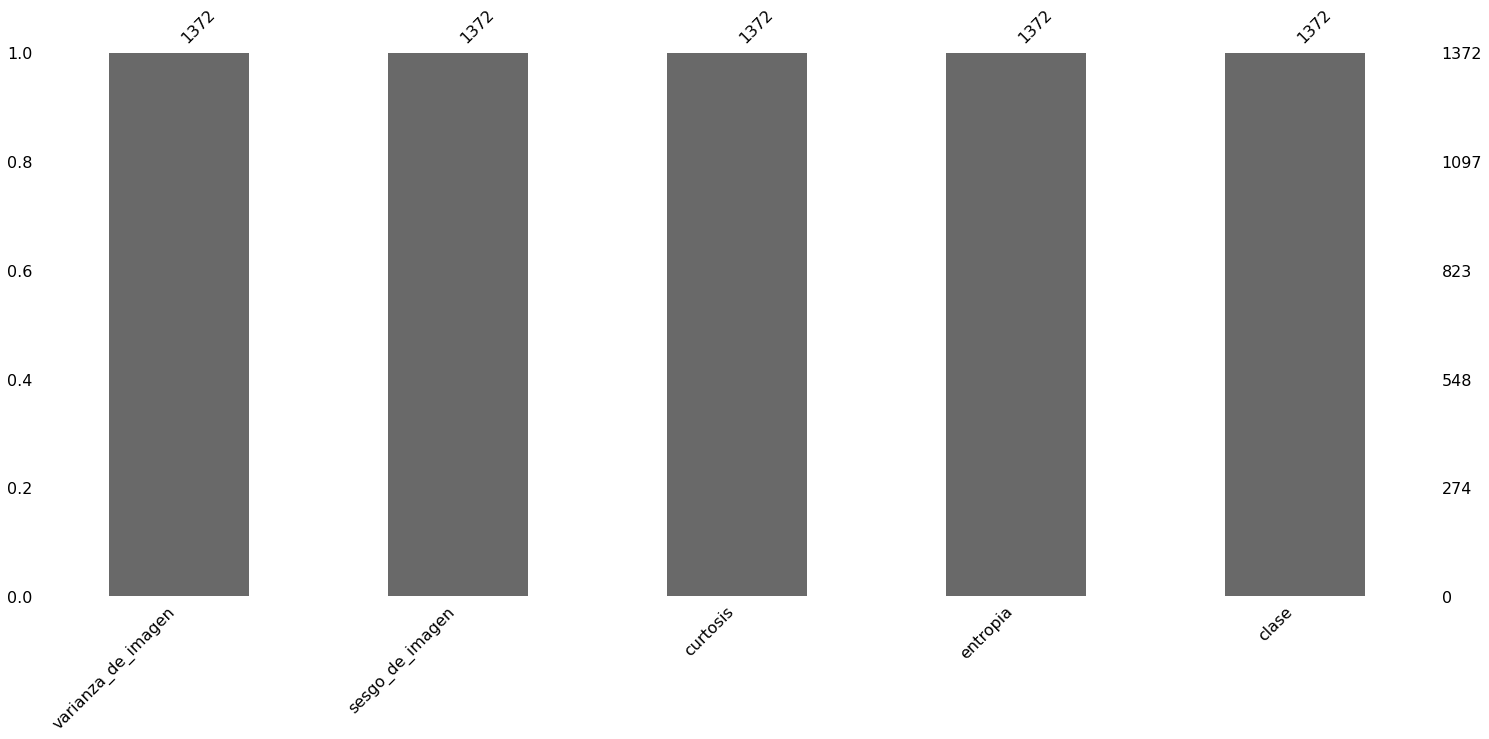

In [6]:
msno.bar(df)


no se encuentran valores perdidos

## Análisis univariado


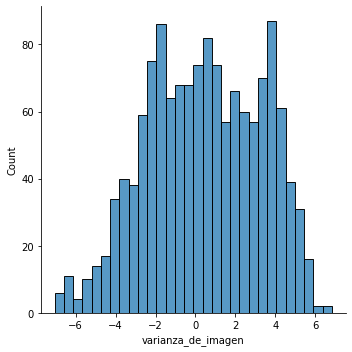

In [7]:
sns.displot(df.varianza_de_imagen.dropna(), kde=False, bins=30)

podemos observar que existen asimetrias en los valores extremos, y que hay picos en los valores -2 y 4, con cambios no significativos en el medio de estos valores de varianza de la imagen transformada

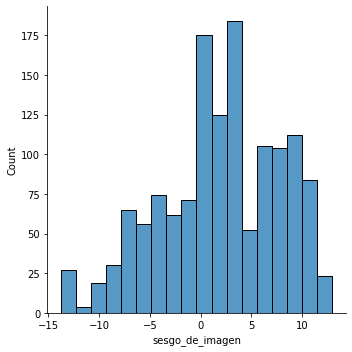

In [8]:
sns.displot(df.sesgo_de_imagen.dropna());

In [9]:
#otro gráfico con la misma variable anterior
px.histogram(df,
            x = 'sesgo_de_imagen')

la variable V2 corresponde a sesgo de la imagen transformada, en los gráficos observamos que existe pico de sesgos en los valores entre 0 y 5

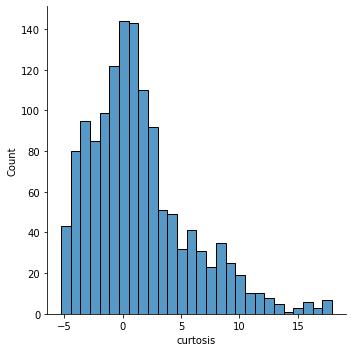

In [10]:
sns.displot(df.curtosis.dropna(), kde=False)

la variable curtosis de la imagen transformada Wavelet también presena picos entre los valores 0 y 3

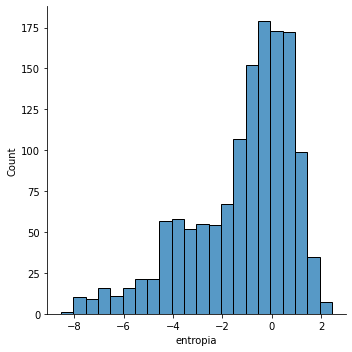

In [11]:
sns.displot(df.entropia.dropna(), kde=False)

la variable entropía de la imagen presenta una asimetría hacia la izquierda donde presumimos que es donde se encuentran los billetes con mayor grado de no originalidad

las 4 variables analizadas son numericas, por lo cual decidí hacer scatterplots para poder visualizar las posibles relaciones entre ellas

## Análisis bivariado

Text(0.5, 1.0, 'Relacion entre varianza y sesgo')

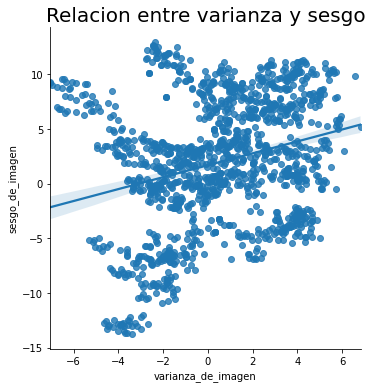

In [12]:
#relacion entre varianza y sesgo de la imagen
sns.lmplot(x="varianza_de_imagen", y="sesgo_de_imagen", data=df)
plt.title('Relacion entre varianza y sesgo', fontsize = 20, fontweight = 30)

Para poder visualizar mejor la posible relación entre las variables, sumé una línea de regresión. Así, vemos que se observa una relación entre varianza de la imagen y el sesgo de la imagen de tipo positiva, significa que a mayor varianza incremente el sesgo de la imagen también

Text(0.5, 1.0, 'Relacion entre curtosis y entropia')

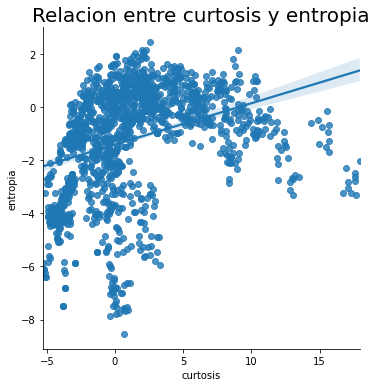

In [13]:
sns.lmplot(x="curtosis", y="entropia", data=df)
plt.title('Relacion entre curtosis y entropia', fontsize = 20, fontweight = 30)

La pendiente positiva indica que existe una relación entre curtosis de la imagen transformada y entropia. A mayor curtosis, mayor entropía

<AxesSubplot:xlabel='curtosis', ylabel='entropia'>

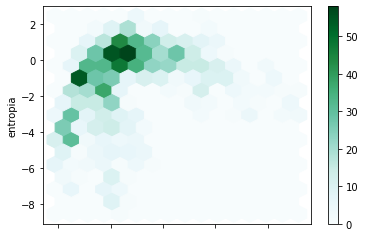

In [14]:
#prueba con una gráfica hexagonal
df.plot.hexbin(x='curtosis', y='entropia', gridsize=15)

## Análisis multivariado

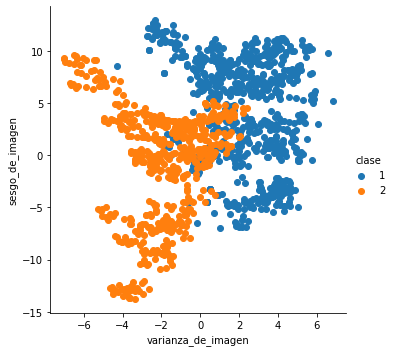

In [15]:
#FacetGrid - sepal_length vs sepal_width
sns.FacetGrid(df,hue = 'clase' , size = 5).map(plt.scatter,'varianza_de_imagen','sesgo_de_imagen').add_legend();
plt.show()

Analizamos las variables "varianza de imagen" y "sesgo de imagen" a partir de poder separarlas por clase, donde 1 corresponde a "presumiblemente genuino" y 2 corresponde a "forjado"

de la misma manera lo hicimos para las variables "curtosis" y "entropia"

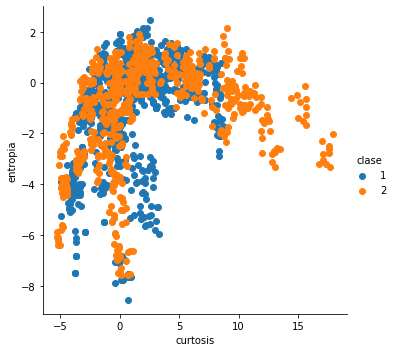

In [16]:
sns.FacetGrid(df,hue = 'clase' , size = 5).map(plt.scatter,'curtosis','entropia').add_legend();
plt.show()

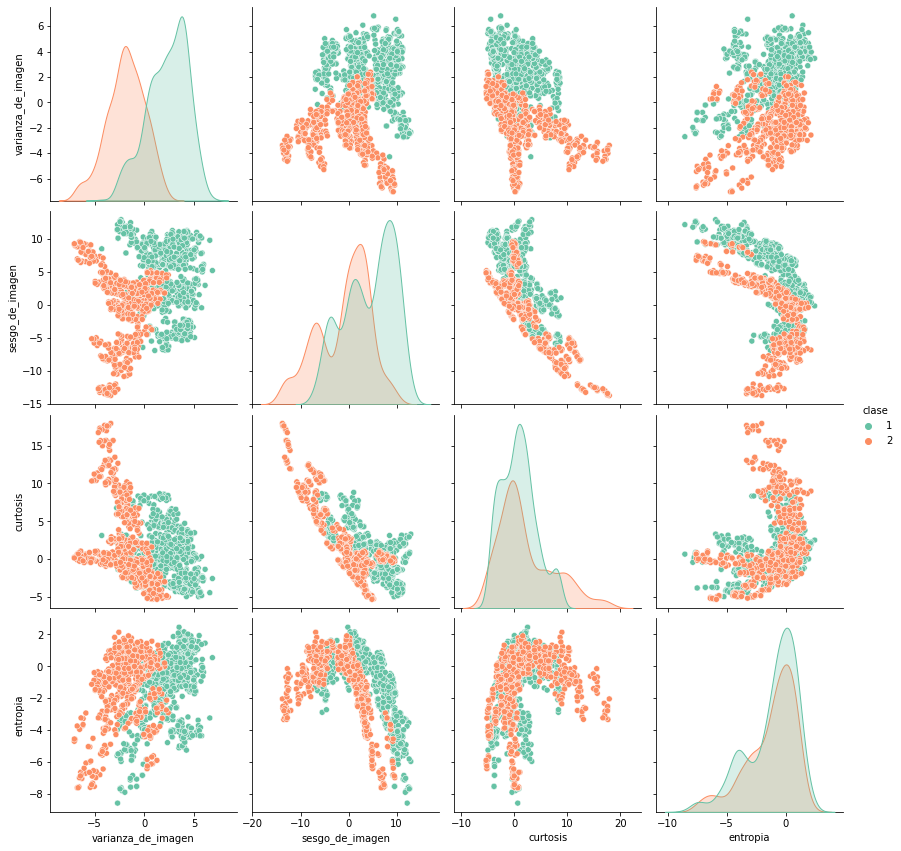

In [17]:
#Pairplot
sns.pairplot(df,hue = 'clase' , size = 3 , palette = 'Set2')

Con pairplot, diferenciamos los scatterplots e histogramas por la variable que quiero predecir (clase -> si los billetes son falsos o verdaderos) En este caso, en los histogramas, se puede visualizar que los billetes "genuinos" (1) tienen una mayor varianza de imagen. Lo mismo sucede con las otras variables, a mayor sesgo, curtosis y entropía los billetes genuinos son las que presentan una mayor distribución. Otra visualización llamativa es la variable curtosis, en los scatterplots se puede ver que a mayores niveles de curtosis, más asociado está a billetes falsos con relación a las otras variables.



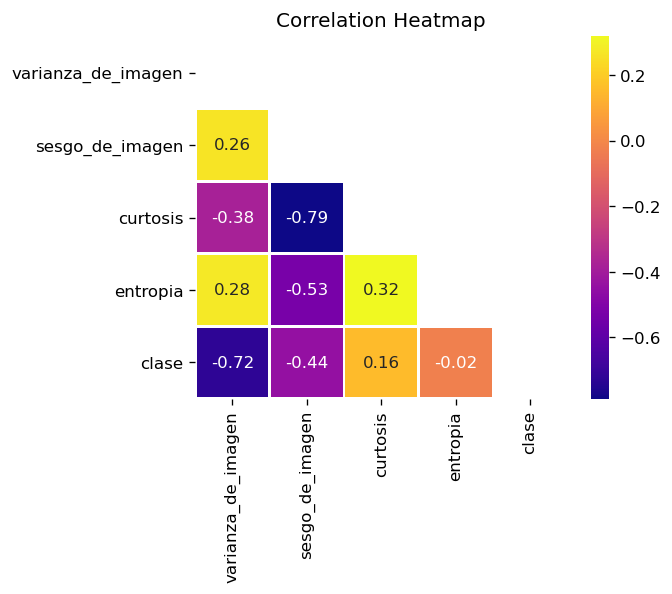

In [18]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

En el mapa de calor, se puede visualizar que en entropia y curtosis hay una leve asociación positiva, lo mismo sucede con entropía-varianza de imagen y sesgo de imagen-varianza de imagen. Con menor asociación positiva se encuentra curtosis-clase. Existe una correlación negativa fuerte entre sesgo imagen-curtosis, seguido de varianza imagen-clase y sesgo de imagen-entropia

Joint plot de varianza_de_imagen con otras variables ==> 

Correlacion entre varianza de imagen y sesgo_de_imagen ==>  0.26402552995746065


<Figure size 500x400 with 0 Axes>

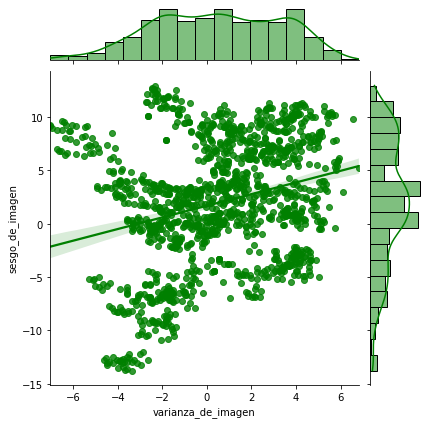

Correlacion entre varianza de imagen y curtosis ==>  -0.3808499719222592


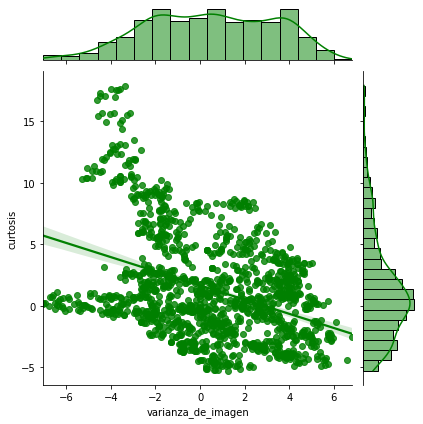

Correlacion entre varianza de imagen y entropia ==>  0.2768166961176217


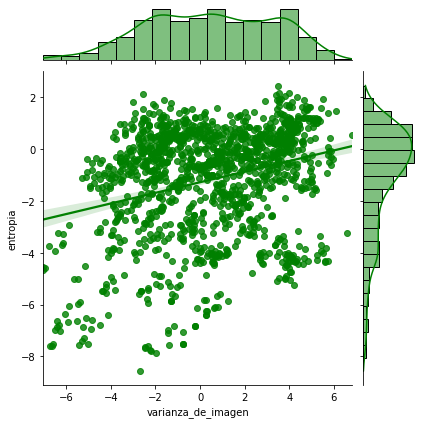

In [19]:
#Crear el join plot entre Varianza de imagen y el resto de las variables 

col = list(df.columns)
idx = col.index('varianza_de_imagen')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de varianza_de_imagen con otras variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre varianza de imagen y {col[i]} ==> ",df.corr().loc['varianza_de_imagen'][col[i]])
    sns.jointplot(x='varianza_de_imagen',y=col[i],data=df,kind = 'reg',color = 'green')
    plt.show()

Varianza de imagen muestra una asociación lineal débil positiva con las variables varianza de imagen y entropía del conjunto de datos dado. Eso significa que al aumentar la varianza de imagen, también aumenta la entropía y sesgo de imagen. Por el contrario, hay una correlación negativa con la variable curtosis. Esto significa que al disminuir la varianza de imagen, también disminuye la curtosis.

Joint plot de 'sesgo_de_imagen' con otras variables ==> 

Correlacion entre sesgo de imagen y curtosis ==>  -0.7868952243438824


<Figure size 500x400 with 0 Axes>

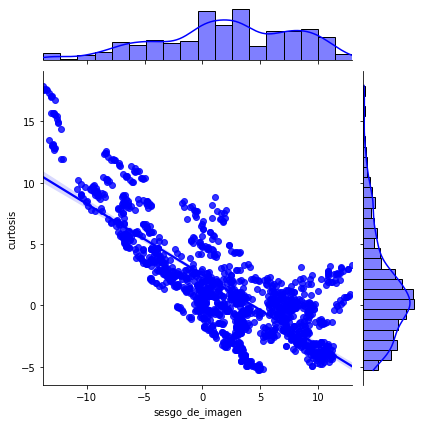

Correlacion entre sesgo de imagen y entropia ==>  -0.5263208424338817


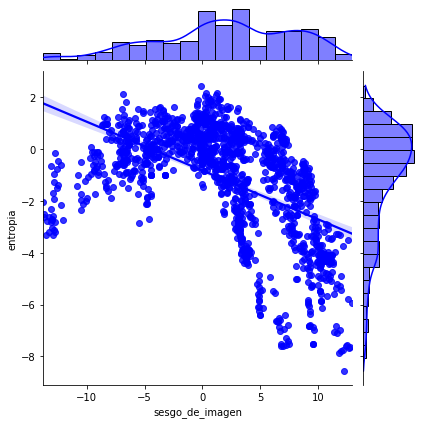

In [20]:
#Crear el join plot entre Varianza de imagen y el resto de las variables 

col = list(df.columns)
idx = col.index('sesgo_de_imagen')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de 'sesgo_de_imagen' con otras variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre sesgo de imagen y {col[i]} ==> ",df.corr().loc['sesgo_de_imagen'][col[i]])
    sns.jointplot(x='sesgo_de_imagen',y=col[i],data=df,kind = 'reg',color = 'blue')
    plt.show()

Por el contrario, hay una correlación negativa con la variable curtosis. Esto significa que al disminuir la varianza de imagen, también disminuye la curtosis.

## ALGORITMO KNN


In [21]:
px.scatter(df,
           x = 'varianza_de_imagen',
           y = 'sesgo_de_imagen',
           color = 'clase')

In [22]:
# División de los datos en train y test
ejex = df.drop(columns = 'clase')
ejey = df['clase']

ejex_train, ejex_test, ejey_train, ejey_test = train_test_split(
                                        ejex,
                                        ejey.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [23]:
#entrenamos el algoritmo KNN con los datos de las etiquetas varianza, sesgo, curtosis y entropia
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

x1 = df[['varianza_de_imagen', 'sesgo_de_imagen', 'curtosis', 'entropia']]
y2 = df[['clase']]

knn.fit(ejex_train, ejey_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
#original
punto_nuevo = {'varianza_de_imagen': [5],
               'sesgo_de_imagen': [12]}

punto_nuevo = pd.DataFrame(punto_nuevo)

In [25]:
prediccion = knn.predict(punto_nuevo)
print(prediccion)

ValueError: query data dimension must match training data dimension

observamos que la predicción con los puntos en 5 y 12 nos devuelve el valor 1, que corresponde al valor de billete genuino como su valor más cercano en la agrupación de etiquetas

In [ ]:
#no sé si está bien
y_pred = knn.predict(ejex_test)
y_pred

##### Cálculo de métricas y su correspondiente interpretación

1. Accuracy

In [ ]:
##no está bien 
from sklearn.metrics import accuracy_score

# Accuracy
acc = accuracy_score(ejey_test, y_pred)
acc

2.  Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(ejey_test, y_pred))

#Ploteamos la Matriz
plot_confusion_matrix(knn, ejex_test, ejey_test)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Calculo del F1 score
f1_score(ejey_test, y_pred)


## ALGORITMO RANDOM FOREST

* El dataset se compone de 5 columnas de las cuales 4 corresponden a variables independientes, que usaremos para predecir el target. 

* Clase es la variable a predecir. Todas las variables son numéricas, ya sea enteras o reales y no tiene valores nulos.

In [ ]:
#Separamos en X e y
X = df.drop(["clase"], axis=1)
y = df["clase"]

In [ ]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [ ]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train, y_train)

In [ ]:
y_test_pred = tree.predict(X_test) #Prediccion en Test

##### Cálculo de métricas y su correspondiente interpretación

1. Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

2. Precision

In [ ]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")

3. Recall

In [ ]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")

4. F1 Score

In [ ]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

In [ ]:
#Creamos un random forest
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

In [ ]:
y_test_pred = model.predict(X_test) #Prediccion en Test

In [ ]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

**Conclusiones**
Con el algoritmo de random forest, obtenemos un mejor accuracy que haciendo uso de un DecisionTreeClassifier

##  algortimo de boosting

 ## optimizador de hiperparámetros: GridSearchCV

In [26]:
#Separacion en X e y
y = df['Class'].to_numpy()

for n in df.columns:
  if str(df[n].dtype) == 'object' or str(df[n].dtype) == 'category':
    df[n] = df[n].astype('category').cat.codes
X = df.drop(['Class'], axis=1).to_numpy()
df.head()

KeyError: 'Class'

In [27]:
#StratifiedKFold - Train y Test
from sklearn.model_selection import StratifiedKFold
skf_bank = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
train, test = list(skf_bank.split(X, y))[0]
X_train = X[train]
X_test = X[test]
y_train = y[train]
y_test= y[test]

NameError: name 'X' is not defined

In [28]:
#Entrenar arbol y encontrar el mejor alpha con GridSearchCV y StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

t_bank = DecisionTreeClassifier()
par_bank = list(np.arange(0.0, 1., step=0.05))
cv_bank = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
tunner_bank = GridSearchCV(estimator=t_bank, param_grid={'ccp_alpha':par_bank}, cv=cv_bank)
_=tunner_bank.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [29]:
print('Train score StratifiedKFold: ' + str(tunner_bank.score(X_train, y_train)))
print('Test score StratifiedKFold: ' + str(tunner_bank.score(X_test, y_test)))

NameError: name 'X_train' is not defined

In [30]:
#KFold
from sklearn.model_selection import KFold
KFold_bank = KFold(n_splits=5, random_state=0, shuffle=True)
train_2, test_2 = list(KFold_bank.split(X))[0]
X_train_2 = X[train_2]
X_test_2 = X[test_2]
y_train_2 = y[train_2]
y_test_2 = y[test_2]

NameError: name 'X' is not defined

In [31]:
#Entrenar arbol y encontrar el mejor alpha con GridSearchCV y KFold
t_bank2 = DecisionTreeClassifier()
par_bank2 = list(np.arange(0.0, 1., step=0.05))
cv_bank2 = KFold(n_splits=5, random_state=0, shuffle=True)
tunner_bank2 = GridSearchCV(estimator=t_bank2, param_grid={'ccp_alpha':par_bank2}, cv=cv_bank2)
_=tunner_bank2.fit(X_train_2, y_train_2)

NameError: name 'X_train_2' is not defined

In [32]:
#Metricas
print('Train score KFold: ' + str(tunner_bank2.score(X_train_2, y_train_2)))
print('Test score KFold: ' + str(tunner_bank2.score(X_test_2, y_test_2)))

NameError: name 'X_train_2' is not defined

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   varianza_de_imagen  1372 non-null   float64
 1   sesgo_de_imagen     1372 non-null   float64
 2   curtosis            1372 non-null   float64
 3   entropia            1372 non-null   float64
 4   clase               1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [34]:
df['Class'].value_counts()

KeyError: 'Class'

In [35]:
X = df[['V1','V2','V3','V4']]
y = df['Class']

KeyError: "None of [Index(['V1', 'V2', 'V3', 'V4'], dtype='object')] are in the [columns]"

In [36]:
#Separamos en Train y Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

NameError: name 'X' is not defined

In [37]:
import lightgbm as lgb #pip install lightgbm
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

ModuleNotFoundError: No module named 'lightgbm'

In [38]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

NameError: name 'y_pred' is not defined